In [4]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np 


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 19s 0us/step


(50000, 32, 32, 3)

In [6]:
y_train.shape 


(50000, 1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

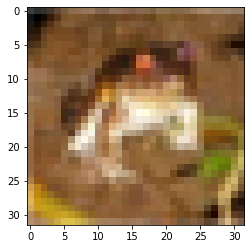

In [9]:
plt.imshow(X_train[0])

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

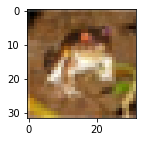

In [17]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [23]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [24]:
classes[9]

'truck'

In [25]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

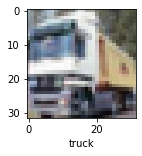

In [26]:
plot_sample(X_train, y_train, 1)

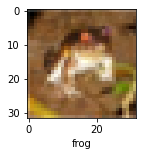

In [27]:
plot_sample(X_train, y_train, 0)

In [28]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [29]:
X_train[0]/200

array([[[0.295, 0.31 , 0.315],
        [0.215, 0.23 , 0.225],
        [0.25 , 0.24 , 0.215],
        ...,
        [0.79 , 0.66 , 0.54 ],
        [0.76 , 0.625, 0.51 ],
        [0.74 , 0.62 , 0.515]],

       [[0.08 , 0.1  , 0.1  ],
        [0.   , 0.   , 0.   ],
        [0.09 , 0.04 , 0.   ],
        ...,
        [0.615, 0.44 , 0.275],
        [0.595, 0.415, 0.25 ],
        [0.61 , 0.435, 0.285]],

       [[0.125, 0.12 , 0.105],
        [0.08 , 0.035, 0.   ],
        [0.245, 0.135, 0.04 ],
        ...,
        [0.59 , 0.42 , 0.25 ],
        [0.6  , 0.42 , 0.25 ],
        [0.545, 0.365, 0.21 ]],

       ...,

       [[1.04 , 0.85 , 0.48 ],
        [1.005, 0.765, 0.17 ],
        [0.99 , 0.805, 0.13 ],
        ...,
        [0.8  , 0.665, 0.35 ],
        [0.28 , 0.155, 0.035],
        [0.265, 0.17 , 0.1  ]],

       [[0.9  , 0.695, 0.48 ],
        [0.865, 0.615, 0.21 ],
        [0.93 , 0.72 , 0.15 ],
        ...,
        [0.92 , 0.74 , 0.47 ],
        [0.485, 0.31 , 0.17 ],
        [0.415,

In [30]:
X_train= X_train / 200
X_test = X_test / 200

In [32]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.8461 - accuracy: 0.3386
Epoch 2/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.6378 - accuracy: 0.4198
Epoch 3/5
1563/1563 [==============================] - 91s 59ms/step - loss: 1.5514 - accuracy: 0.4507
Epoch 4/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4862 - accuracy: 0.47491s - loss: 1.4866 - accuracy: 0.
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4357 - accuracy: 0.4930


In [33]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.5735 - accuracy: 0.4357


[1.5735228061676025, 0.435699999332428]

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.46      0.53      1000
           1       0.70      0.48      0.57      1000
           2       0.47      0.18      0.26      1000
           3       0.23      0.66      0.34      1000
           4       0.73      0.12      0.20      1000
           5       0.32      0.29      0.31      1000
           6       0.63      0.29      0.40      1000
           7       0.45      0.63      0.53      1000
           8       0.49      0.71      0.58      1000
           9       0.56      0.53      0.55      1000

    accuracy                           0.44     10000
   macro avg       0.52      0.44      0.43     10000
weighted avg       0.52      0.44      0.43     10000



In [39]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    
    #dense 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [40]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [41]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.4359 - accuracy: 0.4840
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0939 - accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9641 - accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8789 - accuracy: 0.6952
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8177 - accuracy: 0.7165
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7650 - accuracy: 0.7363
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7195 - accuracy: 0.7505
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6800 - accuracy: 0.7654
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6463 - accuracy: 0.7752
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [42]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9279 - accuracy: 0.6951


[0.9279400110244751, 0.6951000094413757]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


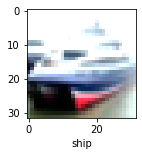

In [43]:
y_test = y_test.reshape(-1, )
plot_sample(X_test, y_test, 1)

In [44]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.51376997e-03, 1.07940426e-03, 1.01468212e-03, 9.38234389e-01,
        7.04840990e-04, 3.90025601e-02, 1.27774235e-02, 1.90511448e-04,
        5.41940052e-03, 6.30323120e-05],
       [2.21171285e-04, 2.16267519e-02, 1.71283432e-07, 5.54272042e-08,
        1.47812496e-09, 5.24519247e-11, 2.09794696e-10, 4.56672167e-09,
        9.77492392e-01, 6.59369165e-04],
       [1.12310909e-01, 1.22952700e-01, 7.48495397e-04, 1.08879467e-03,
        8.05761956e-04, 1.70280400e-04, 5.04245872e-05, 5.22973714e-04,
        7.52517521e-01, 8.83206911e-03],
       [8.20736706e-01, 7.90394470e-03, 6.46732608e-03, 2.17644003e-04,
        3.26377456e-03, 3.94531435e-06, 2.03109666e-04, 3.70048583e-05,
        1.61103636e-01, 6.30070790e-05],
       [4.11525298e-06, 2.27476179e-04, 7.56915063e-02, 2.61230022e-02,
        4.83036011e-01, 6.10810937e-04, 4.12922502e-01, 2.41936846e-06,
        1.37590035e-03, 6.22733614e-06]], dtype=float32)

In [47]:
np.argmax(y_pred[0])

3

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


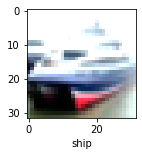

In [50]:
plot_sample(X_test, y_test, 1)

In [51]:
classes


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
classes[y_classes[1]]

'ship'

In [53]:
classes[y_classes[5]]

'frog'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


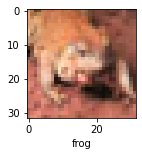

In [54]:
plot_sample(X_test, y_test, 5)

In [55]:
print("classification Report: \n", classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.78      0.84      0.81      1000
           2       0.57      0.62      0.59      1000
           3       0.52      0.50      0.51      1000
           4       0.63      0.63      0.63      1000
           5       0.60      0.62      0.61      1000
           6       0.76      0.78      0.77      1000
           7       0.77      0.73      0.75      1000
           8       0.76      0.82      0.79      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

